# Import Libraries and Setup

In [2]:
# plotting
import matplotlib.pyplot as plt

# manipulate data
import pandas as pd

# more plotting
import seaborn as sns

# custom functions
from gtrends import og_get_daily_trend as get_daily_trend
from pytrends.dailydata import get_daily_data

# library to access google trends
# library to access google trends
from pytrends.request import TrendReq

pytrend = TrendReq()

# make pandas types compatibile with matplotlibs
pd.plotting.register_matplotlib_converters()

# change pandas plotting backend
pd.options.plotting.backend = "plotly"

# create a dictionary to unpack to update plotly plots settings
# why can't it be as easy as with ggplot...
plotly_dict = dict(
    font_family="Yanone Kaffeesatz",
    template="none",
    title={"x": 0.05, "xanchor": "left"},
)

sns_dict = {
    "axes.facecolor": "1",
    "grid.color": "0.9",
    "font.family": ["sans-serif"],
    "font.sans-serif": ["Yanone Kaffeesatz", "DejaVu Sans"],
}

sns.set_style(style="whitegrid", rc=sns_dict)
sns.set_palette(palette="deep")
%matplotlib inline

plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.dpi"] = 100

# Monthly Data 

If we choose the timespan from 2012/01/01 to the latest day available, we will retrieve monthly data. We set the frequency of this data to `"MS"`, which is month start. This data can either be downlaoded straight from Google Trends or retrieved with `pytrends`. Moreover, zeroes are replaced with ones to simplify the following operations. Finally, all data is cast to `int`.

In [13]:
pytrend.build_payload(["Mario Draghi"], timeframe="2012-01-01 2021-08-31")

draghi_monthly_until_2021 = pytrend.interest_over_time().drop(columns="isPartial").asfreq("MS").add(1)

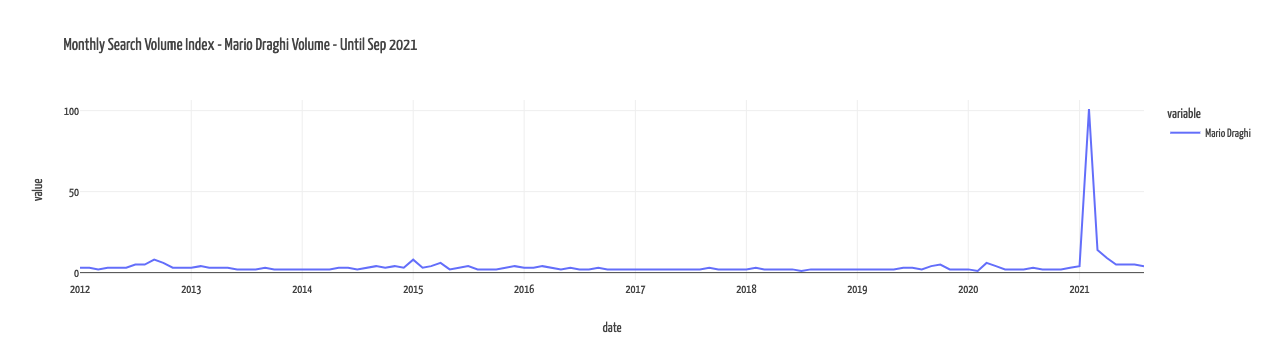

In [22]:
(
    draghi_monthly_until_2021
    .plot(title="Monthly Search Volume Index - Mario Draghi Volume - Until Sep 2021")
    .update_layout(**plotly_dict)
)

The problem with this series is that there is basically no variance in the series if February 2021 is included into the sample. What happens if we exclude it?

In [16]:
pytrend.build_payload(["Mario Draghi"], timeframe="2012-01-01 2020-12-31")

draghi_monthly_until_2020 = pytrend.interest_over_time().asfreq("MS").drop(columns="isPartial").add(1)

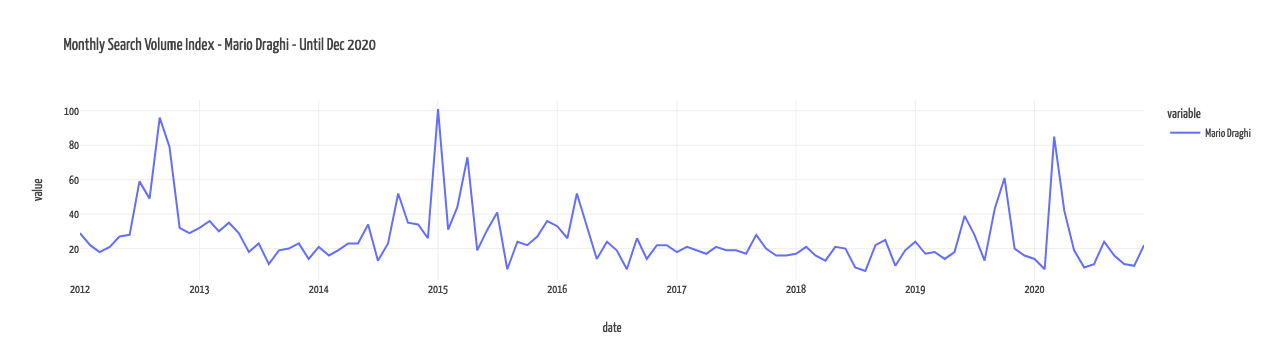

In [21]:
(
    draghi_monthly_until_2020
    .plot(title="Monthly Search Volume Index - Mario Draghi - Until Dec 2020")
    .update_layout(**plotly_dict)
)

The data seems much more well behaved. We clearly see the peaks around July-September 2012, when Mario Draghi gave out its "Whatever it takes" speech. In January 2015, the ECB launched the Quantitative Easing and in March 2020 Draghi wrote an influential opinion piece on the Financial Times about the role of fiscal policy to recoup from the economic slump caused by the COVID-19 pandemic.

Ideally, it might be better to remove the values from 2021 - at least for now. Let's save the data.

In [23]:
draghi_monthly_until_2020.to_csv("../02-data/python/gtrends-monthly-mario_draghi-until_2020.csv")
draghi_monthly_until_2021.to_csv("../02-data/python/gtrends-monthly-mario_draghi-until_2021.csv")

# Weekly Data

Weekly data can be retrieved with queries between 9 months and 5 years.

In [29]:
pytrend.build_payload(["Mario Draghi"], timeframe="today 5-y")

draghi_weekly_last_5_years = pytrend.interest_over_time().asfreq("W").drop("isPartial", axis=1).add(1)

Since we can retrieve 5 years of data, we get all the data until the beginning of 2017.

In [33]:
pytrend.build_payload(["Mario Draghi"], timeframe="2012-01-01 2017-01-01")

draghi_weekly_first_5_years = pytrend.interest_over_time().asfreq("W").drop("isPartial", axis=1).add(1)

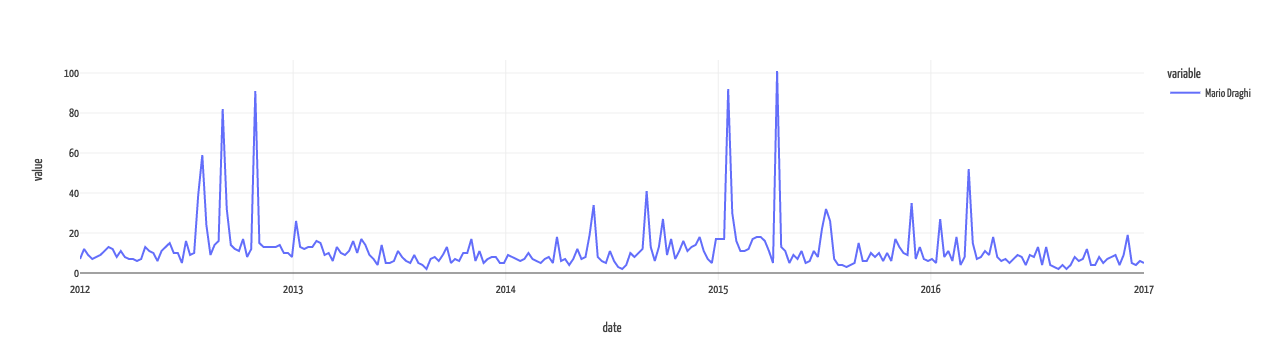

In [36]:
draghi_weekly_first_5_years.plot().update_layout(**plotly_dict)

In [38]:
draghi_weekly_first_5_years.to_csv("../02-data/python/gtrends-weekly-mario_draghi-2012_2017.csv")
draghi_weekly_last_5_years.to_csv("../02-data/python/gtrends-weekly-mario_draghi-2016_2021.csv")

# Daily Data With `pytrends`

In [40]:
from pytrends.dailydata import get_daily_data

draghi_daily_2020 = get_daily_data("Mario Draghi", start_year=2012, start_mon=1, stop_year=2020, stop_mon=12)

Mario Draghi:2012-01-01 2012-01-31
Mario Draghi:2012-02-01 2012-02-29
Mario Draghi:2012-03-01 2012-03-31
Mario Draghi:2012-04-01 2012-04-30
Mario Draghi:2012-05-01 2012-05-31
Mario Draghi:2012-06-01 2012-06-30
Mario Draghi:2012-07-01 2012-07-31
Mario Draghi:2012-08-01 2012-08-31
Mario Draghi:2012-09-01 2012-09-30
Mario Draghi:2012-10-01 2012-10-31
Mario Draghi:2012-11-01 2012-11-30
Mario Draghi:2012-12-01 2012-12-31
Mario Draghi:2013-01-01 2013-01-31
Mario Draghi:2013-02-01 2013-02-28
Mario Draghi:2013-03-01 2013-03-31
Mario Draghi:2013-04-01 2013-04-30
Mario Draghi:2013-05-01 2013-05-31
Mario Draghi:2013-06-01 2013-06-30
Mario Draghi:2013-07-01 2013-07-31
Mario Draghi:2013-08-01 2013-08-31
Mario Draghi:2013-09-01 2013-09-30
Mario Draghi:2013-10-01 2013-10-31
Mario Draghi:2013-11-01 2013-11-30
Mario Draghi:2013-12-01 2013-12-31
Mario Draghi:2014-01-01 2014-01-31
Mario Draghi:2014-02-01 2014-02-28
Mario Draghi:2014-03-01 2014-03-31
Mario Draghi:2014-04-01 2014-04-30
Mario Draghi:2014-05

This data needs to be modified: zeros are still present and columns need renaming.

In [41]:
draghi_daily_2020_rescaled = draghi_daily_2020.rename(
    columns={
        "Mario Draghi_unscaled": "draghi_unscaled",
        "Mario Draghi_monthly": "draghi_monthly",
        "Mario Draghi": "draghi",
        "scale": "scale_factor"
    }
).assign(
    # replace zeros with one
    draghi_unscaled=lambda x: x["draghi_unscaled"].add(1),
    draghi_monthly=lambda x: x["draghi_monthly"].add(1),
    # rescale the data
    scale_factor=lambda x: x["draghi_monthly"] / 100,
    draghi=lambda x: x["draghi_unscaled"] * x["scale_factor"],
).drop(columns="isPartial", axis=1)

In [42]:
draghi_daily_2020_rescaled.to_csv("../02-data/python/retrieved-daily-mario_draghi-pytrends-until_2020.csv")

# Daily Data with `local_maxima`

For this, we need to load the custom library `gtrends.py` ([original source](https://github.com/qztseng/google-trends-daily)). I have changed the function to add 1 to each value, to avoid getting zeros, and renamed the `get_daily_trend` function into `og_get_daily_trend` because I might plan to tweak it more.

In [44]:
from gtrends import og_get_daily_trend

# keywords to search
keywords = ["Mario Draghi", "Christine Lagarde", "Euro", "European Central Bank"]

# start and end date, YYYY-MM-DD format
start = "2012-01-01"
end = "2020-12-31"

In [45]:
print("Retrieving Daily Data for keyword 'Mario Draghi' with overlapping window = 30")
draghi_daily_overlap_30 = og_get_daily_trend(
    trendreq=pytrend,
    keyword=keywords[0],
    start=start,
    end=end,
    delta=269,
    overlap=30
)

print("Retrieving Daily Data for keyword 'Mario Draghi' with overlapping window = 100")
draghi_daily_overlap_100 = og_get_daily_trend(
    trendreq=pytrend,
    keyword=keywords[0],
    start=start,
    end=end,
    delta=269,
    overlap=100
)

print("Done!")

Retrieving Daily Data for keyword 'Mario Draghi' with overlapping window = 30
Retrieving Daily Data for keyword 'Mario Draghi' with overlapping window = 100


The data displays zeros, but this happens because the scaling and the subsequent rounding bring the data to that value.

In [52]:
draghi_daily_overlap = (
    draghi_daily_overlap_30
    .drop("overlap", axis=1)
    .merge(
        draghi_daily_overlap_100.drop("overlap", axis=1),
        left_index=True,
        right_index=True
    )
    .rename(columns={
        "Mario Draghi_x": "draghi_30",
        "Mario Draghi_y": "draghi_100"
    })
)

In [54]:
draghi_daily_overlap.to_csv("../02-data/python/retrieved-daily-mario_draghi-overlap-until_2020.csv")